# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.xlsx`
- `startup_funding2020.xlsx`
- `startup_funding2021.xlsx`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [133]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By

In [134]:
# Create two obgect, one with the path of the file and one with the year of the file
years = [2020, 2021, 2022]
filenames =[r"D:\Users\guidi\anaconda3\esercizi\Week 15 - Final Assignment\Week 15 - Final Assignment\data\startup_funding2019.xlsx",
    r"D:\Users\guidi\anaconda3\esercizi\Week 15 - Final Assignment\Week 15 - Final Assignment\data\startup_funding2020.xlsx",
        r"D:\Users\guidi\anaconda3\esercizi\Week 15 - Final Assignment\Week 15 - Final Assignment\data\startup_funding2021.xlsx"]

In [135]:
# Create a empty dataframe
fnd = pd.DataFrame()

# Loop for the obgect created and for any cycle create a temp dataframe and add a column 'Year', then add a df dadaframe
for filename, year in zip(filenames, years):
    df_tmp = pd.read_excel(filename)
    df_tmp = df_tmp.assign(Year=year)
    fnd = pd.concat([fnd, df_tmp])


In [136]:
fnd.shape

(2343, 10)

<span style="color:yellow"> The Shape of dataframe is (2343, 10)</span>

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [137]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 201.4+ KB


In [138]:
fnd.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2020
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2020
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2020
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2020
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2020


In [139]:
fnd['Founded'].unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, 2020.0, 1998.0, 2007.0,
       1982.0, 2009.0, 1995.0, 2006.0, 1978.0, 1999.0, 1994.0, 2005.0,
       1973.0, '-', 2002.0, 2001.0, 2021.0, 1993.0, 1989.0, 2000.0,
       2003.0, 1991.0, 1984.0, 1963.0], dtype=object)

In [140]:
# Cleaning the column from special caracters
md = fnd['Founded'].mode().iloc[0]
fnd['Founded']=fnd['Founded'].fillna(md)
fnd['Founded'].replace('-', md , inplace=True)

In [141]:
fnd['Founded'] = fnd['Founded'].astype(int)

In [142]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2343 non-null   int32 
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int32(1), int64(1), object(8)
memory usage: 192.2+ KB


In [143]:
# Cleaning the column from special caracters
fnd['Amount($)'] = fnd['Amount($)'].replace('[$,]', '', regex=True)
fnd['Amount($)'] = fnd['Amount($)'].replace('Undisclosed', 0)

In [144]:
fnd.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,2019,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN,2020
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C,2020
2,Eduisfun,2019,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding,2020
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D,2020
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN,2020


In [145]:
fnd['Amount($)'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000', 0,
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000', '200000', '340000', '45000000', '1200000', '660000000',
       '120000', '7500000', '500000', '3000000', '10000000', '145000000',
       '21000000', '560000', '275000', '4500000', '390000000', '5100000',
       '700000000', '2300000', '700000', '19000000', '9000000',
       '40000000', '750000', '7800000', '80000000', '1700000', '40000',
       '35000000', '300

In [146]:
# Cleaning the column from special caracters
fnd['Amount($)']=fnd['Amount($)'].fillna(0)
fnd['Amount($)'] = fnd['Amount($)'].astype(float)

In [147]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2343 non-null   int32  
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      2343 non-null   float64
 8   Stage          1220 non-null   object 
 9   Year           2343 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 192.2+ KB


In [148]:
fnd.groupby('Year')['Amount($)'].sum()/1000000

Year
2020      3336.433200
2021     90858.963656
2022    177349.237000
Name: Amount($), dtype: float64

<span style="color:yellow"> The total amound of funfing is reported in the cell above </span>

3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [149]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [231]:
#Filter the dataset for year 2020
fnd_2020 = fnd[fnd['Year'] == 2020]
# Group by the data for the investot
fnd_grouped=fnd_2020.groupby('Investor').size()
fnd_grouped=fnd_grouped.reset_index(name='count').sort_values('count', ascending=False)
fnd_grouped.loc[fnd_grouped['Investor'] == 'Inflection Point Ventures']

,Investor,count
24,Inflection Point Ventures,1


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [151]:
sps=pd.read_excel(r'D:\Users\guidi\anaconda3\esercizi\Week 15 - Final Assignment\Week 15 - Final Assignment\data\Software Professionals Salary.xlsx')

In [152]:
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000.0,3.0,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000.0,3.0,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000.0,3.0,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000.0,3.0,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000.0,3.0,Bangalore,Full Time,Android


<span style="color:yellow">Question N 1</span>

In [153]:
fnd.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,2019,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2020
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2020
2,Eduisfun,2019,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2020
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2020
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2020


In [154]:
sps_loc = sps.groupby('Location')[['Rating', 'Salary']].mean().reset_index()
sps_loc.head()

,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481


<span style="color:yellow">Question N 2</span>

In [155]:
fnd_loc = fnd[fnd.Year == 2021].groupby('HeadQuarter').aggregate({'Company/Brand': 'size', 'Amount($)': 'sum'}).reset_index()
fnd_loc.head()

,HeadQuarter,Company/Brand,Amount($)
0,Ahmedabad,11,5.171900e+07
1,Andheri,2,2.200000e+07
2,Bangaldesh,1,2.200000e+07
3,Bangalore,319,5.176849e+09
4,Bangkok,1,9.000000e+06


<span style="color:yellow">Question N 3</span>

In [156]:
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')
sps_fnd_loc.head(25)

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,Bangalore,319,5.176849e+09
1,Chennai,3.902726,584559.661513,Chennai,43,2.081881e+08
2,Hyderabad,3.914484,679099.157376,Hyderabad,26,1.788210e+08
3,Jaipur,3.940741,629135.802469,Jaipur,9,8.565000e+07
4,Kerala,3.885185,553577.481481,Kerala,3,0.000000e+00
5,Kolkata,4.024719,710925.573034,Kolkata,11,2.836650e+07
6,Mumbai,3.881709,961180.368491,Mumbai,164,7.514425e+10
7,New Delhi,3.943415,658756.735632,New Delhi,36,8.906320e+08
8,Pune,3.886082,690476.311153,Pune,36,8.409740e+08


<span style="color:yellow">Question N 4.1</span>

In [157]:
sps_fnd_loc = sps_fnd_loc.drop(columns=['HeadQuarter'])
sps_fnd_loc.head()

,Location,Rating,Salary,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,319,5.176849e+09
1,Chennai,3.902726,584559.661513,43,2.081881e+08
2,Hyderabad,3.914484,679099.157376,26,1.788210e+08
3,Jaipur,3.940741,629135.802469,9,8.565000e+07
4,Kerala,3.885185,553577.481481,3,0.000000e+00


<span style="color:yellow">Question N 4.2</span>

In [158]:
sps_fnd_loc['Amount($MM)']=sps_fnd_loc['Amount($)']/1000000
sps_fnd_loc.head()

,Location,Rating,Salary,Company/Brand,Amount($),Amount($MM)
0,Bangalore,3.920232,735344.739593,319,5.176849e+09,5176.849358
1,Chennai,3.902726,584559.661513,43,2.081881e+08,208.188146
2,Hyderabad,3.914484,679099.157376,26,1.788210e+08,178.821000
3,Jaipur,3.940741,629135.802469,9,8.565000e+07,85.650000
4,Kerala,3.885185,553577.481481,3,0.000000e+00,0.000000


<span style="color:yellow">Question N 4.3</span>

In [159]:
sps_fnd_loc = sps_fnd_loc.drop(columns=['Amount($)'])
sps_fnd_loc.head()

,Location,Rating,Salary,Company/Brand,Amount($MM)
0,Bangalore,3.920232,735344.739593,319,5176.849358
1,Chennai,3.902726,584559.661513,43,208.188146
2,Hyderabad,3.914484,679099.157376,26,178.821000
3,Jaipur,3.940741,629135.802469,9,85.650000
4,Kerala,3.885185,553577.481481,3,0.000000


<span style="color:yellow">Question N 4.4</span>

In [160]:
sps_fnd_loc = sps_fnd_loc.rename(columns={'Location': 'City', 'Rating': 'Avg. Rating', 'Salary': 'Avg. Salary', 'Company/Brand': 'Nr. Companies Funded', 'Amount($MM)': 'Sum Funding ($MM)'})

In [161]:
sps_fnd_loc.head(10)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,319,5176.849358
1,Chennai,3.902726,584559.661513,43,208.188146
2,Hyderabad,3.914484,679099.157376,26,178.821000
3,Jaipur,3.940741,629135.802469,9,85.650000
4,Kerala,3.885185,553577.481481,3,0.000000
5,Kolkata,4.024719,710925.573034,11,28.366500
6,Mumbai,3.881709,961180.368491,164,75144.249542
7,New Delhi,3.943415,658756.735632,36,890.632000
8,Pune,3.886082,690476.311153,36,840.974000


<span style="color:yellow">Question N 4.5 </span>

In [162]:
sps_fnd_loc = sps_fnd_loc.sort_values('Avg. Rating', ascending=False)

In [163]:
first_row = sps_fnd_loc.head(1)
nr_companies_funded = first_row['Nr. Companies Funded'].values[0]
print(f'Nr. Companies Funded: {nr_companies_funded}')

Nr. Companies Funded: 11


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

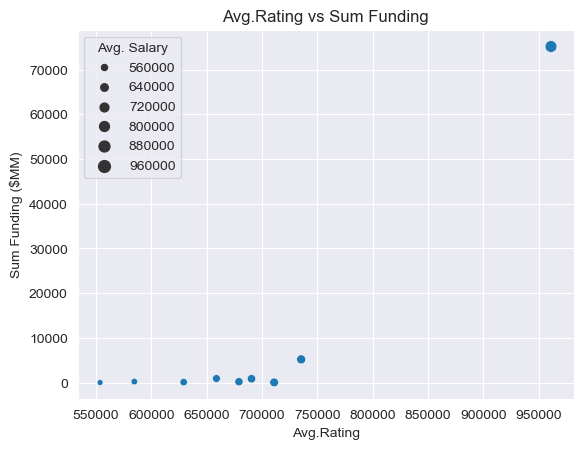

In [164]:
sns.set_style('darkgrid')
sns.scatterplot(x='Avg. Salary', y='Sum Funding ($MM)', size='Avg. Salary', palette='viridis', data=sps_fnd_loc)

plt.title('Avg.Rating vs Sum Funding')
plt.xlabel('Avg.Rating')
plt.ylabel('Sum Funding ($MM)')

plt.show()

In [165]:
sps_fnd_loc=sps_fnd_loc.sort_values('Sum Funding ($MM)', ascending=False)
sps_fnd_loc.head(1)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
6,Mumbai,3.881709,961180.368491,164,75144.249542


<span style="color:yellow">The City stands out in terms of total funding received by companies and salary paid to their employees is Mumbai</span>

6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 

In [166]:
driver = webdriver.Chrome(executable_path=r'D:\Users\guidi\anaconda3\esercizi\Week 15 - Final Assignment\Week 15 - Final Assignment\chromedriver.exe')

In [167]:
driver.get('https://www.census2011.co.in/city.php')

In [168]:
# this code estract all tag_name td
elements=driver.find_elements(By.TAG_NAME, "td")


In [169]:
# This code creates a list of sublists, where each sublist contains the elements of the original list divided into groups of 7
sublists = []
for i in range(0, len(elements), 7):
    sublist = elements[i:i+7]
    sublists.append(sublist)
sublist

[<selenium.webdriver.remote.webelement.WebElement (session="774aae2ab8aa4878a49c3abe3bb50135", element="89d2b148-4109-431d-8e02-b45f2a071afc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="774aae2ab8aa4878a49c3abe3bb50135", element="a9adcc71-49b6-4770-92e2-a8eb8c7eedda")>,
 <selenium.webdriver.remote.webelement.WebElement (session="774aae2ab8aa4878a49c3abe3bb50135", element="1a910b14-602a-423b-9916-a25f30797e68")>,
 <selenium.webdriver.remote.webelement.WebElement (session="774aae2ab8aa4878a49c3abe3bb50135", element="2b7117b6-9aba-4eb1-bd0d-3a389cfad740")>]

In [170]:
# Create a sublist that contein the text extracted from WebElement
text_values = []
for sublist in sublists:
    sublist_text = []
    for element in sublist:
        text = element.text
        sublist_text.append(text)
    text_values.append(sublist_text)


In [171]:
# Create a df from the sublist
cities = pd.DataFrame(text_values)
cities.head()


,0,1,2,3,4,5,6
0,1,Mumbai,Maharashtra,"12,442,373","18,414,288",853,89.73
1,2,Delhi,Delhi,"11,034,555","16,314,838",876,87.59
2,3,Bangalore,Karnataka,"8,443,675","8,499,399",923,88.71
3,4,Hyderabad,Andhra Pradesh,"6,731,790","7,749,334",955,83.26
4,5,Ahmedabad,Gujarat,"5,577,940","6,352,254",898,88.29


In [172]:
cities = cities.drop(cities.columns[0],axis=1)
cities.head()

,1,2,3,4,5,6
0,Mumbai,Maharashtra,"12,442,373","18,414,288",853,89.73
1,Delhi,Delhi,"11,034,555","16,314,838",876,87.59
2,Bangalore,Karnataka,"8,443,675","8,499,399",923,88.71
3,Hyderabad,Andhra Pradesh,"6,731,790","7,749,334",955,83.26
4,Ahmedabad,Gujarat,"5,577,940","6,352,254",898,88.29


In [173]:
new_column_names = {1: 'City', 2: 'State', 3: 'Population', 4: 'Metropolitan', 5: 'SexRatio', 6: 'Literacy'}
cities.rename(columns=new_column_names, inplace=True)
cities.head()


,City,State,Population,Metropolitan,SexRatio,Literacy
0,Mumbai,Maharashtra,"12,442,373","18,414,288",853,89.73
1,Delhi,Delhi,"11,034,555","16,314,838",876,87.59
2,Bangalore,Karnataka,"8,443,675","8,499,399",923,88.71
3,Hyderabad,Andhra Pradesh,"6,731,790","7,749,334",955,83.26
4,Ahmedabad,Gujarat,"5,577,940","6,352,254",898,88.29


In [174]:
cities.tail(25)

,City,State,Population,Metropolitan,SexRatio,Literacy
480,Ambala Sadar,Haryana,"103,093","103,093",921,88.46
481,Nagapattinam,Tamil Nadu,"102,905","102,905",1026,89.02
482,Nagaur,Rajasthan,"102,872","108,540",945,70.68
483,Buxar,Bihar,"102,861","110,608",895,83.82
484,Seoni,Madhya Pradesh,"102,343","102,343",955,90.46
485,Aurangabad,Bihar,"102,244","102,244",910,86.03
486,Greater Noida,Uttar Pradesh,"102,054","102,054",837,86.47
487,Hinganghat,Maharashtra,"101,805","101,805",936,93.25
488,Sujangarh,Rajasthan,"101,523","101,523",956,73.33
489,Bhadreswar,West Bengal,"101,477","101,477",903,86.51


In [175]:
# Eliminates rows that do not comply with the dataframe standard, considering that the latter are not of a significant number to influence the analysis
cities = cities.drop(cities.index[-7:])

In [176]:
cities.shape

(498, 6)

In [177]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          498 non-null    object
 1   State         498 non-null    object
 2   Population    498 non-null    object
 3   Metropolitan  498 non-null    object
 4   SexRatio      498 non-null    object
 5   Literacy      498 non-null    object
dtypes: object(6)
memory usage: 27.2+ KB


In [178]:
cities['Population']=cities['Population'].str.replace(',', '')
cities['Metropolitan']=cities['Metropolitan'].str.replace(',', '')
cities.head()

,City,State,Population,Metropolitan,SexRatio,Literacy
0,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,Delhi,Delhi,11034555,16314838,876,87.59
2,Bangalore,Karnataka,8443675,8499399,923,88.71
3,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,Ahmedabad,Gujarat,5577940,6352254,898,88.29


In [179]:
cities['Population']=cities['Population'].astype(int)
cities['Metropolitan']=cities['Metropolitan'].astype(int)
cities['SexRatio']=cities['SexRatio'].astype(int)
cities['Literacy']=cities['Literacy'].astype(float)

In [180]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          498 non-null    object 
 1   State         498 non-null    object 
 2   Population    498 non-null    int32  
 3   Metropolitan  498 non-null    int32  
 4   SexRatio      498 non-null    int32  
 5   Literacy      498 non-null    float64
dtypes: float64(1), int32(3), object(2)
memory usage: 21.4+ KB


<span style="color:yellow">Question N 1 <span>

In [181]:
cities.sort_values('Literacy', ascending=False).head(1)


,City,State,Population,Metropolitan,SexRatio,Literacy
150,Aizawl,Mizoram,293416,293416,1025,98.36


<span style="color:yellow">Question N 2</span>

In [182]:
sps_fnd_loc_lit = pd.merge(sps_fnd_loc, cities, on='City')

In [183]:
cities.head()

,City,State,Population,Metropolitan,SexRatio,Literacy
0,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,Delhi,Delhi,11034555,16314838,876,87.59
2,Bangalore,Karnataka,8443675,8499399,923,88.71
3,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,Ahmedabad,Gujarat,5577940,6352254,898,88.29


In [184]:
sps_fnd_loc.head(25)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
6,Mumbai,3.881709,961180.368491,164,75144.249542
0,Bangalore,3.920232,735344.739593,319,5176.849358
7,New Delhi,3.943415,658756.735632,36,890.632000
8,Pune,3.886082,690476.311153,36,840.974000
1,Chennai,3.902726,584559.661513,43,208.188146
2,Hyderabad,3.914484,679099.157376,26,178.821000
3,Jaipur,3.940741,629135.802469,9,85.650000
5,Kolkata,4.024719,710925.573034,11,28.366500
4,Kerala,3.885185,553577.481481,3,0.000000


In [185]:
sps_fnd_loc_lit.head(25)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),State,Population,Metropolitan,SexRatio,Literacy
0,Mumbai,3.881709,961180.368491,164,75144.249542,Maharashtra,12442373,18414288,853,89.73
1,Bangalore,3.920232,735344.739593,319,5176.849358,Karnataka,8443675,8499399,923,88.71
2,Pune,3.886082,690476.311153,36,840.974000,Maharashtra,3124458,5049968,948,89.56
3,Chennai,3.902726,584559.661513,43,208.188146,Tamil Nadu,4646732,8696010,989,90.18
4,Hyderabad,3.914484,679099.157376,26,178.821000,Andhra Pradesh,6731790,7749334,955,83.26
5,Jaipur,3.940741,629135.802469,9,85.650000,Rajasthan,3046163,3046163,900,83.33
6,Kolkata,4.024719,710925.573034,11,28.366500,West Bengal,4496694,14112536,908,86.31


<span style="color:yellow">I noticed that some cities were being excluded due to the different name used in the two dataframes</span>

In [186]:
# The values ​​of the following cities were reported in different value in the different dataframes, so I corrected the values ​​to perfect the union
sps_fnd_loc.loc[sps_fnd_loc['City'] == 'New Delhi', 'City'] = 'Delhi'

In [187]:
# Re-merged to bring back previously excluded values
sps_fnd_loc_lit = pd.merge(sps_fnd_loc, cities, on='City')
sps_fnd_loc_lit.head(24)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),State,Population,Metropolitan,SexRatio,Literacy
0,Mumbai,3.881709,961180.368491,164,75144.249542,Maharashtra,12442373,18414288,853,89.73
1,Bangalore,3.920232,735344.739593,319,5176.849358,Karnataka,8443675,8499399,923,88.71
2,Delhi,3.943415,658756.735632,36,890.632000,Delhi,11034555,16314838,876,87.59
3,Pune,3.886082,690476.311153,36,840.974000,Maharashtra,3124458,5049968,948,89.56
4,Chennai,3.902726,584559.661513,43,208.188146,Tamil Nadu,4646732,8696010,989,90.18
5,Hyderabad,3.914484,679099.157376,26,178.821000,Andhra Pradesh,6731790,7749334,955,83.26
6,Jaipur,3.940741,629135.802469,9,85.650000,Rajasthan,3046163,3046163,900,83.33
7,Kolkata,4.024719,710925.573034,11,28.366500,West Bengal,4496694,14112536,908,86.31


<span style="color:yellow">Question N 3</span>

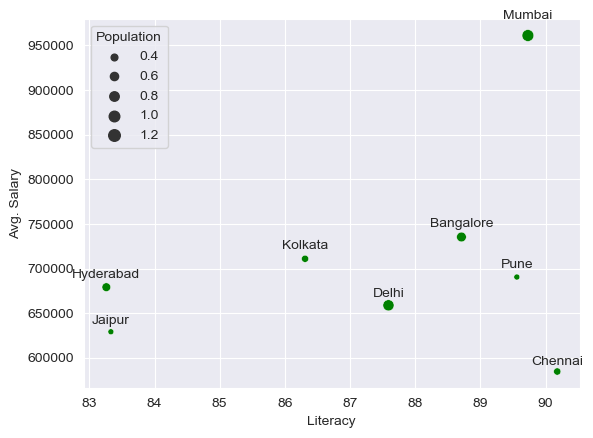

In [188]:
sns.scatterplot(x='Literacy', y='Avg. Salary', size='Population', data=sps_fnd_loc_lit, color='green')
for city, x, y in zip(sps_fnd_loc_lit['City'], sps_fnd_loc_lit['Literacy'], sps_fnd_loc_lit['Avg. Salary']):
    plt.text(x, y*1.03, city, ha='center', va='top')
plt.show()

<span style="color:yellow">The graph shows that as literacy increases, the average salary also increases. However, there is an exception for the city of Chennai. Further analysis is needed, but given the small population, this may be influencing salaries in some way.</span>